# Multiprocessing, Threads, subprocess, concurrent.futures, asyncio, event loops...

### There are lots of names

#### (thread, task, process...)

### There are a lot of options

### Options for what?

* Parallel (concurrency)
    * Many tasks at same time
    * Utilize full CPU
* Process control (run scripts and stuff)
    * Control command-line scripts from Python
    * Control Python from Python


Some things are taken from this [good article](https://realpython.com/python-concurrency/).

### Parallel

Reasons for using parallel:

* Problem creates or requires too much data for a normal.
* Sun would explode before the computation would finish.
* Algorithm is easy to parallelize.
* The physics itself cannot be simulated with smaller resources.


Source: [Effective Computation in Physics](http://shop.oreilly.com/product/0636920033424.do)

### Embarrassingly Parallel

Tasks are independent from each other but need to do a lot of them.

* Summing a very large array

* Monte Carlo simulations
* Stochastic & Genetic algorithms

### _More processors means more fasterer_

* Should say "processes" not "processors".
* Should say "faster" not "more fasterer".

### Non-embarrassingly Parallel

* Canonical example: inverting a matrix

### Large-scale problems defined by architecture

(nothing to do with Python)

* High-performance computing (HPC)
    * aka Supercomputers
* High-throughput computing (HTC
    * aka Distributed Computing

## CPU-Bound vs I/O-Bound

* Waiting on the CPU (difficult tasks)
-vs-
* Waiting on a slow device (network, hard-drive, hardware).

_**Opening and closing files is the most expensive thing you can do**_

(i.e. you are I/O-bound)

# Python

Two big players:

* Threads
* Multiprocessing


`concurrent.futures` is part of standard library and makes using either one easy.

# Threads

## **Don't**

## Multiprocessing

## Gotchas

* Need to have a `__main__`.  [Read why](https://docs.python.org/3/library/multiprocessing.html#multiprocessing-programming).
* Sharing information between processes (use [`Queues` and `Pipes`](https://docs.python.org/3/library/multiprocessing.html#exchanging-objects-between-processes)).

## Examples

# But first...

## Process control

Not to be confused with processors. Or is it?

## `subprocess`

When you want to control something else on the command line, e.g. a running script.

In [1]:
!cat long-running-script-with-output.sh

#!/bin/bash -e

FILE=${1:-results.txt}

echo "This script is the best!"

echo "Outputting results to ${FILE}"

echo "date,result_0,result_1" &> ${FILE}
for i in {1..10}; do
    echo "$(date +%FT%T),${RANDOM},${RANDOM}" &>> ${FILE}
    sleep 1
done

echo "I'm all done!"


In [2]:
import subprocess
import shutil

bash = shutil.which('bash')

# Name of my script
my_super_script = 'long-running-script-with-output.sh'

cmd = [bash, my_super_script]

# Notice I will block and capture the output
proc = subprocess.run(cmd, capture_output=True)

proc.stdout

b"This script is the best!\nOutputting results to results.txt\nI'm all done!\n"

In [3]:
import pandas as pd

# Add an argument to bash script
results_file = 'my_results.csv'

cmd = [bash, my_super_script, results_file]

# Run command and wait for it to finish
proc = subprocess.run(cmd, capture_output=True)

if proc.returncode != 0:
    print(f'AN ERROR IN YOUR FILE')
else:
    df0 = pd.read_csv(results_file).set_index('date')
    df0.index = pd.to_datetime(df0.index)

In [4]:
df0

,result_0,result_1
date,,
2019-07-04 14:53:35,16361,26422
2019-07-04 14:53:36,15866,9022
2019-07-04 14:53:37,15502,20410
2019-07-04 14:53:38,24398,2061
2019-07-04 14:53:39,15878,32230
2019-07-04 14:53:40,17431,22895
2019-07-04 14:53:41,3212,27493
2019-07-04 14:53:42,21348,22286
2019-07-04 14:53:43,22812,23650


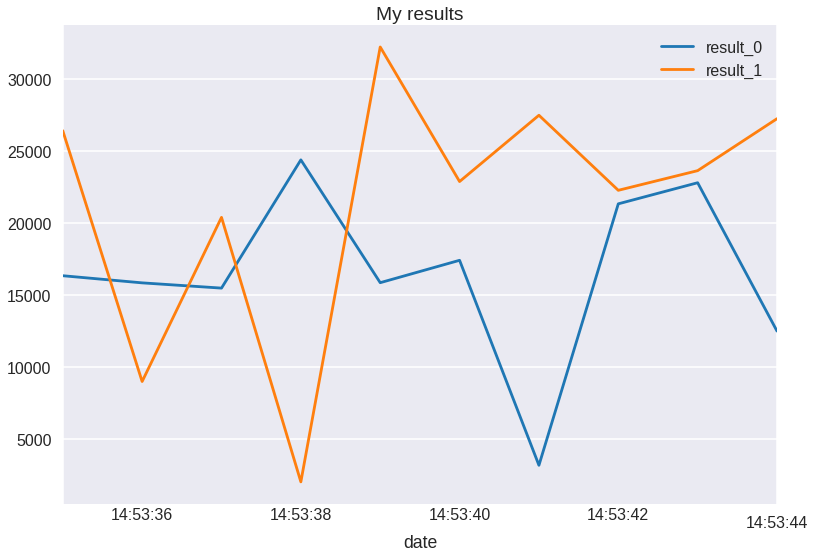

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-poster')

df0.plot(label='Data', title='My results', legend=True);